# Gradient Descent Optimizer


목적함수 $f$의 최솟값(minimum)을 찾아가는 알고리즘으로 다음과 같은 방식으로 최솟값을 찾아간다.
- 초기값 $x_0$와 적당한 Learning rate $\alpha$ 설정
- $n\geq 0$인 정수에 대해서 $x_{n+1}$은 다음과 같이 정의한다.

$$
x_{n+1} := x_n - \alpha \cdot \nabla f(x_n)
$$

- 주의사항
    - 함수$f$의 모양이 convex가 아닌 경우 global minimum이 아닌 local minimum으로 $x_n$이 수렴할 가능성이 있다.
    - Learning rate $\alpha$ 값이 큰 경우 최솟값으로 $x_n$이 수렴하는 것이 아니라 발산할 수 있다.
    - Learning rate $\alpha$ 값이 작은 경우 수렴하는 속도가 지나치게 느릴 수 있다.
     
![](data/gradient2.png)

방정식 $2\cdot x = 10$ 의 근을 Gradient Descent 알고리즘을 이용해서 찾아보자.
- 목적함수 $f(x):=(2x-10)^2$으로 설정 *($f$의 최솟값인 0이 되는 $x$값이 우리가 원하는 방정식의 근)*
- 초기값 $x_0 = 0$, Learning rate $\alpha=0.05$으로 설정
 
$f'(x) = 4(2x-10)$이므로 $x_1$은 다음과 같이 구할 수 있다.
\begin{align}
x_1 &= x_0 -\alpha \cdot f'(x_0)\\
&= 0 - 0.05 \cdot (-40)\\
&=2
\end{align}

그리고 $x_2$는
\begin{align}
x_2 &= x_1 -\alpha \cdot f'(x_1)\\
&= 2 - 0.05 \cdot (-24)\\
&=3.2
\end{align}

반복적으로 이 같은 작업을 반복해서 $x_n$의 수열을 다음과 같이 얻을 수 있다.
$$
(x_n) = (0, 2, 3.2, 3.92, 4.352, 4.6112, ...)
$$



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_0 = 0.0
x_1 = 2.0
x_2 = 3.2
x_3 = 3.92
x_4 = 4.352
x_5 = 4.6112003
x_6 = 4.7667203
x_7 = 4.860032
x_8 = 4.9160194
x_9 = 4.9496117
x_10 = 4.969767
x_11 = 4.98186
x_12 = 4.989116
x_13 = 4.9934697
x_14 = 4.996082
x_15 = 4.997649
x_16 = 4.9985895
x_17 = 4.9991536
x_18 = 4.999492
x_19 = 4.9996953


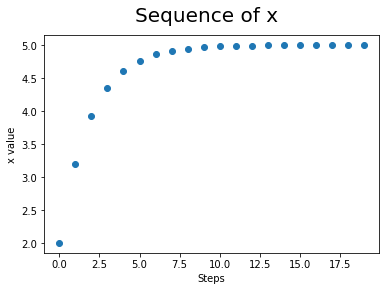

In [2]:
# 방정식 2*x = 10 을 만족하는 x 찾기
# x 초깃값 = 0

X = tf.Variable(0.)
Y = tf.constant(10.)


loss = tf.square(2*X-Y)
optimize = tf.train.GradientDescentOptimizer(0.05).minimize(loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
sequence = []

for i in range(20):
    print("x_%i = %s" %(+i, sess.run(X)))
    sess.run(optimize)
    sequence.append(sess.run(X))

plt.suptitle("Sequence of x", fontsize=20)
plt.ylabel("x value")
plt.xlabel("Steps")
_ = plt.plot(sequence, "o")

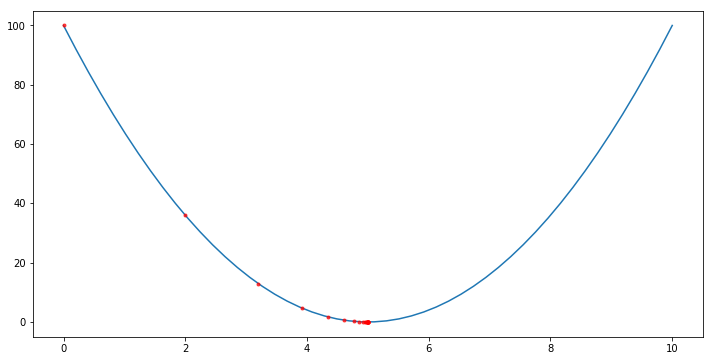

In [3]:
x = np.linspace(0,10)

def f(x):
    X = np.array(x)
    y = np.square(2*X-10)
    return y

plt.figure(figsize=(12,6))
plt.plot(x,f(x))
plt.plot(0,f(0), "r.", alpha=0.7)
plt.plot(sequence,f(sequence), "r.", alpha=0.7)

# Momentum Optimizer

Gradient Descent Optimizer 보다 개선된 알고리즘으로 이동값에 `관성`으로 인한 업데이트가 추가된 Optimizer이다. 다음과 같은 Gradient Descent Optimizer의 한계를 개선하는데 효과가 있는 알고리즘이다.

- global minimum이 아닌 local minimum으로 수렴
- 최솟값을 찾아가는 도중에 미분계수가 0인 지점에서 더 이상 이동하지 않음

![](data/momentum.png)
Gradient Descent Optimize의 이동량은 미분계수에 의해 결정되기 때문에 미분계수가 0이면 더 이상 업데이트가 되지 않는다.


Momentum Optimizer는 다음과 같이 목적함수 $f$의 최솟값을 찾는다.
- 초기값 $x_0$와 적당한 Learning rate $\alpha$, momentum $\beta$ 설정
- $n\geq 0$인 정수에 대해서 $a_{n+1}$과 $x_{n+1}$은 다음과 같이 정의

$$
a_{n+1} := \beta\cdot a_n + \nabla f(x_n), \quad  a_0 := 0
$$

$$
x_{n+1} := x_n - \alpha \cdot a_{n+1}
$$

즉, momentum 계수 $\beta=0$인 경우, Gradient Descent Optimizer와 동일한 알고리즘이다. $\nabla f(x_n)=0$ 임에도 $a_n$에 의한 `관성효과`로 $x_n$은 업데이트된다(다음 그림 참조).

![](data/gd_mo.png)


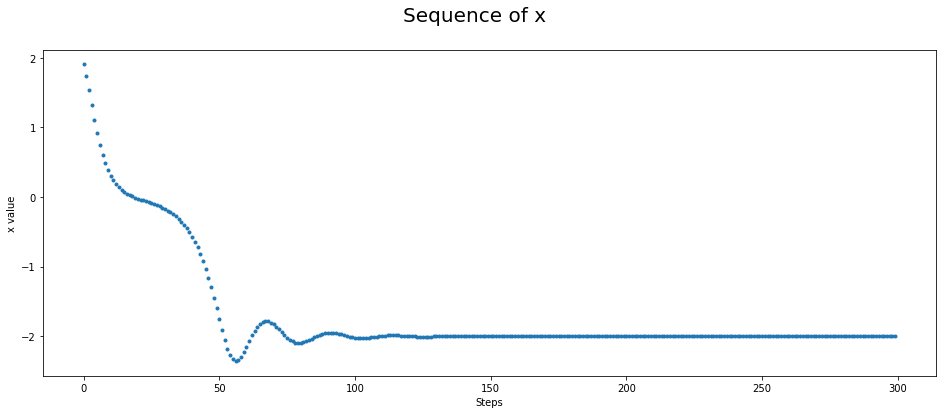

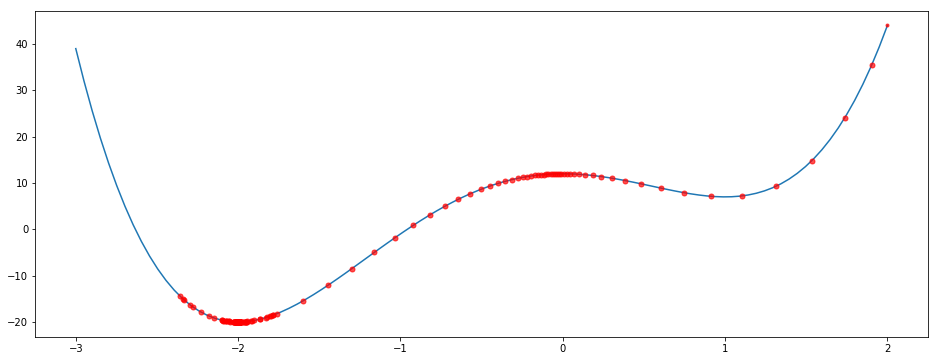

In [4]:
X = tf.Variable(2.)

loss = 3*X**4 + 4*X**3 - 12*X**2 +12
# optimize = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
optimize = tf.train.MomentumOptimizer(0.001, 0.89).minimize(loss)


sess = tf.Session()
sess.run(tf.global_variables_initializer())
sequence = []

for i in range(300):
    sess.run(optimize)
    sequence.append(sess.run(X))

plt.figure(figsize=(16,6))
plt.suptitle("Sequence of x", fontsize=20)
plt.ylabel("x value")
plt.xlabel("Steps")
_ = plt.plot(sequence, ".")

x = np.linspace(-3,2,100)

def f_2(x):
    X = np.array(x)
    y = 3* X**4 + 4*X**3 - 12*X**2 +12
    return y


plt.figure(figsize=(16,6))
plt.plot(x,f_2(x))

plt.plot(2,f_2(2), "r.", alpha=0.7)
plt.plot(sequence,f_2(sequence), "ro", markersize = 5, alpha=0.7)

# Perceptron

Perceptron 이란 neuron을 구성하는 하나의 단위

![](data/perceptron.png)

입력변수 $X=(x_1,\ldots,x_n)$, weight $W = \left(\begin{array}{cc} w_{1}\\ \vdots  \\ w_{n} \end{array}\right)$, bias $b$, activation function(활성함수) $f$ 및 출력
$$
H(X)=f(XW+b) = f\left(\sum_{i=1}^n w_i x_i +b \right )
$$

으로 구성되어있고 주어진 데이터를 잘 설명하는 $W$와 $b$를 찾는 것이 학습의 목적이다.

# Activation function
Activation function으로 주로 쓰이는 함수들은 다음과 같다.
- **Step function**: $$\,
f(z):= \begin{cases} 1 \quad \text{if } z\geq 0\\
0 \quad \text{otherwise}
\end{cases}
$$
또는
$$\,
f(z):= \begin{cases} 1 \quad \text{if } z\geq 0\\
-1 \quad \text{otherwise}
\end{cases}
$$

- **linear(without activation)**:
$$\,
f(z):= z
$$

- **Sigmoid, `tf.sigmoid`**:
$$\,
f(z):= \frac{1}{1+e^{-z}}
$$

- **Hyperbolic tangent, `tf.tanh`**:
$$\,
f(z):= \tanh(z)
$$

- **Relu, Rectified Linear Unit, `tf.nn.relu`**:
$$\,
f(z):= \max(0,z)
$$

In [5]:
X = tf.constant(
    [[1,1],
     [2,2],
     [3,3]], dtype=tf.float32)

W = tf.constant([[1], [2]], dtype=tf.float32)

b = tf.constant(0, dtype=tf.float32)

H = tf.matmul(X, W) + b

$$
X = \left(\begin{array}{cc} 1& 1\\
2 & 2 \\
3& 3 \\
\end{array}\right) 
$$

$$
W = \left(\begin{array}{cc} 1\\
2 \\
\end{array}\right) 
$$

$$
b = 0
$$

$$
XW + b = \left(\begin{array}{cc} 1& 1\\
2 & 2 \\
3& 3 \\
\end{array}\right) \left(\begin{array}{cc} 1\\
2 \\
\end{array}\right) 
+ \left(\begin{array}{cc} 0\\
0 \\
0 \\
\end{array}\right) = \left(\begin{array}{cc} 3\\
6 \\
9 \\
\end{array}\right)
$$

In [6]:
sess = tf.Session()
print(sess.run(H))

[[3.]
 [6.]
 [9.]]


-----------